kalman filters are recursive algorithm that estimate that state of a dynamic system based on a series of noisy observations

uses a series of equations to update its estimates based on new data

kalman filters minimize the mean squared error of the estimate



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#generate data for simulation

np.random.seed(0)
n = 50 #variable with 50 values, nb of data points generated

x = np.linespace(0, 10, n) # generate 50 numbers from 0 to 10 equally spaced
y = 2*x + 1 +np.random.normal(0, 1, n)  #define true underlying relation and add gaussian noise
# in gaussian noise, mean=0, std=1 and n is number of noises generated
#simulates rela world noisy measurment

def kalman_filter(data, Q=0.1, R=0.1)
#data= noisy measurement, Q is process noise covariance and R is measurement noise covariance
#Q is how much we expect the true state to change randomly
#R is how noisy the measurements are

n = len(data)
x_hat = np.zeros(n)  #estimated x, will store final estimates
P = np.zeros(n) #will store error covariance, the lower the better
P_minus = np.zeros(n)

for i in range(1, n):
    #loop through each time step
    x_hate_minus[i] = x_hat[i-1] #prediction for i is estimate from i-1
    P_minus[i] = P[i-1] + Q

    K = P_minus[i] / (P_minus[i] + R)
    











In [6]:
#now implement kalman filters to real data

import yfinance as yf
#fetch historical closing price data for apple and microsoft
tickers_1 = yf.Ticker("AAPL")
data_1 = tickers_1.history(start="2020-01-01", end="2024-01-01")['Close']
tickers_2 =yf.Ticker("MSFT")
data_2 = tickers_2.history(start="2020-01-01", end="2024-01-01")['Close']

#now estimate spread between the 2 assets
#use kalman_filter_pairs to compute predicted spread based on the data and filter out noise to generate more reliable signal for trading
import numpy as np
def kalman_filter_pairs(data_1, data_2, Q=0.1, R=0.1):
    n = len(data_1)
    spread = data_1 - data_2
    x_hat = np.zeros(n)
    P = np.zeros(n)
    x_hat_minus = np.zeros(n)
    P_minus = np.zeros(n)

    for k in range(1, n):
        # Time update
        x_hat_minus[k] = x_hat[k-1]
        P_minus[k] = P[k-1] + Q
        # Measurement update
        K = P_minus[k] / (P_minus[k] + R)
        x_hat[k] = x_hat_minus[k] + K * (spread[k] - x_hat_minus[k])
        P[k] = (1 - K) * P_minus[k]
    return x_hat
# Applying Kalman Filter to pairs trading data
filtered_spread = kalman_filter_pairs(data_1, data_2)


C:\Users\alexi\AppData\Local\Temp\ipykernel_9168\282651207.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_hat[k] = x_hat_minus[k] + K * (spread[k] - x_hat_minus[k])


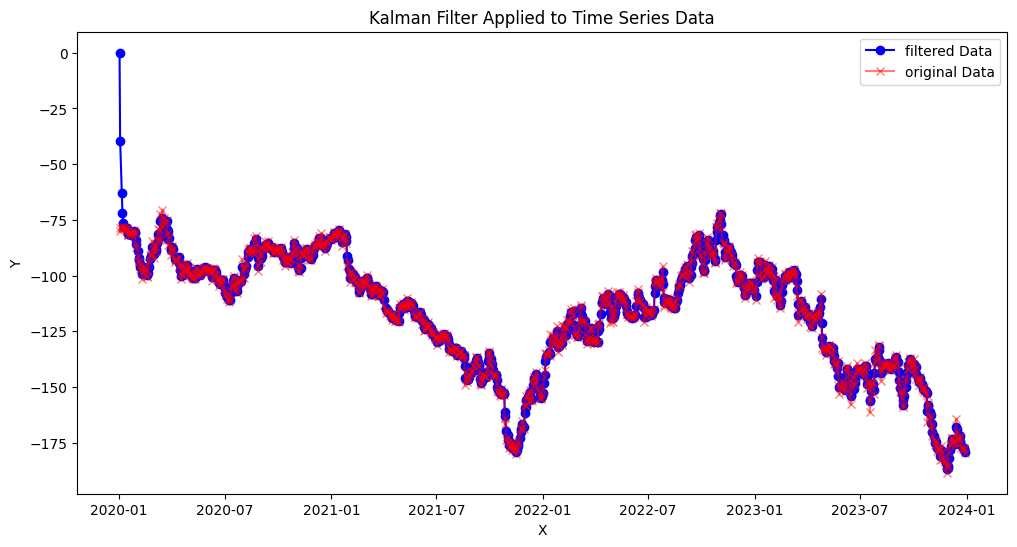

In [13]:
# Plotting the original data and filtered data
import matplotlib.pyplot as plt
spread = data_1 - data_2

plt.figure(figsize=(12, 6))
plt.plot(spread.index, filtered_spread, label='filtered Data', marker='o', color='blue')
plt.plot(spread.index, spread, label='original Data', marker='x', color='red', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Kalman Filter Applied to Time Series Data')
plt.show()

C:\Users\alexi\AppData\Local\Temp\ipykernel_9168\2586167342.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_hat[k] = x_hat_minus[k] + K * (spread[k] - x_hat_minus[k])


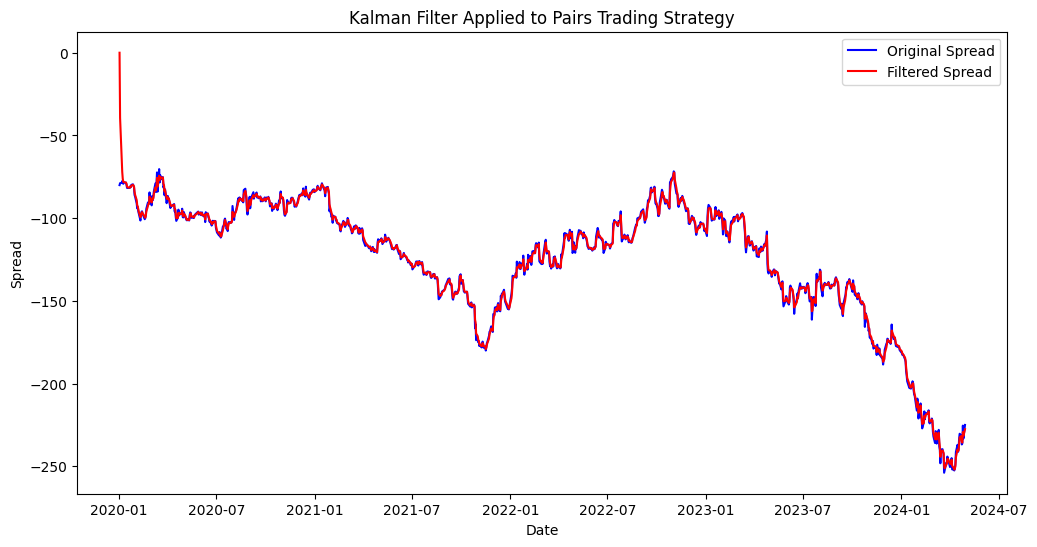

In [14]:
# Kalman Filter implementation for pairs trading

import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
# Downloading real-world financial data using yfinance library
ticker_1 = yf.Ticker("AAPL")
data_1 = ticker_1.history(start="2020-01-01", end="2024-04-30")['Close']
ticker_2 = yf.Ticker("MSFT")
data_2 = ticker_2.history(start="2020-01-01", end="2024-04-30")['Close']
def kalman_filter_pairs(data_1, data_2, Q=0.1, R=0.1):
    n = len(data_1)
    spread = data_1 - data_2
    x_hat = np.zeros(n)    # Predicted state estimate
    P = np.zeros(n)        # Predicted error covariance
    x_hat_minus = np.zeros(n)
    P_minus = np.zeros(n)
    for k in range(1, n):
        # Time update
        x_hat_minus[k] = x_hat[k-1]
        P_minus[k] = P[k-1] + Q
        # Measurement update
        K = P_minus[k] / (P_minus[k] + R)
        x_hat[k] = x_hat_minus[k] + K * (spread[k] - x_hat_minus[k])
        P[k] = (1 - K) * P_minus[k]
    return x_hat
# Applying Kalman Filter to pairs trading data
filtered_spread = kalman_filter_pairs(data_1, data_2)
# Visualizing the original spread and filtered spread
plt.figure(figsize=(12, 6))
plt.plot(data_1.index, data_1.values - data_2.values,
         label='Original Spread', color='b')
plt.plot(data_1.index, filtered_spread, label='Filtered Spread', color='r')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.title('Kalman Filter Applied to Pairs Trading Strategy')
plt.show()